In [101]:
%matplotlib inline
import numpy as np
import xarray as xr
import pandas as pd
import pygmt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Load sample grid (3 arc-seconds global relief) in target area
topo= pygmt.datasets.load_earth_relief(resolution="01m", region="0/360/-90/-40")
dgrid = pygmt.grdgradient(grid=topo,azimuth="90/225",normalize="e1")

In [24]:
snowmelt=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_snowmelt_hourly_2015.nc').to_array('__xarray_dataarray_variable__')
#temperature=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_2m_temperature_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
#windu=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_10m_u_component_of_wind_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
#windv=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_10m_v_component_of_wind_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
snowmelt_daily = snowmelt.resample(time='1D',skipna=False).sum()
del snowmelt

In [40]:
temperature=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_2m_temperature_hourly_2015.nc').to_array('__xarray_dataarray_variable__')
#windu=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_10m_u_component_of_wind_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
#windv=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_10m_v_component_of_wind_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
temperature_daily = temperature.resample(time='1D',skipna=False).mean()
del temperature

In [138]:
min_lon = -112.5 
min_lat = -73.5 
max_lon = -101.0 
max_lat = -75.75


snowmelt_thwaites = snowmelt_daily.sel(latitude=slice(min_lat,max_lat), longitude=slice(min_lon,max_lon))
temperature_thwaites = temperature_daily.sel(latitude=slice(min_lat,max_lat), longitude=slice(min_lon,max_lon))

In [145]:
snowmelt_thwaites

<xarray.DataArray (__xarray_dataarray_variable__: 1, time: 365, latitude: 23,
                   longitude: 116)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         ...,
         [-4.47034836e-08, -4.47034836e-08, -4.47034836e-08, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [-4.47034836e-08, -4.47034836e-08, -4.47034836e-08, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [-4.47034836e-08, -4.47034836e-08, -4.47034836e-08, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
...
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [-4.47034836e-08, -4.47034836e-08, -4.47034836e-08, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [-4.47034836e-08, -4.47034836e-08, -4.47034836e-08, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           1.08668655e-02,  6.95973821e-03,  3.04044224e-03],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         ...,
         [-4.47034836e-08, -4.47034836e-08, -4.47034836e-08, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [-4.47034836e-08, -4.47034836e-08, -4.47034836e-08, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08],
         [-4.47034836e-08, -4.47034836e-08, -4.47034836e-08, ...,
          -4.47034836e-08, -4.47034836e-08, -4.47034836e-08]]]],
      dtype=float32)
Coordinates:
  * longitude                      (longitude) float32 -112.5 -112.4 ... -101.0
  * latitude                       (latitude) float32 -73.5 -73.6 ... -75.7
  * __xarray_dataarray_variable__  (__xarray_dataarray_variable__) object 'smlt'
  * time                           (time) datetime64[ns] 2015-01-01 ... 2015-...
Attributes:
    Conventions:  CF-1.6
    history:      2023-04-20 08:50:05 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [146]:
#weights = np.cos(np.deg2rad(snowmelt_thwaites['latitude']))
weighted_snowmelt_thwaites = snowmelt_thwaites # broadcasting here
weighted_temperature_thwaites = temperature_thwaites# broadcasting here

thwaites_melt_mean = weighted_snowmelt_thwaites.mean(['latitude','longitude'],skipna=True)
thwaites_temperature_mean = weighted_temperature_thwaites.mean(['latitude','longitude'],skipna=True)

In [147]:
lthw = pd.read_csv('../../thwaites-gnss-ir/data/Files/lthw_allRH.csv', delimiter=',',parse_dates= {"date" : [" % year"," Month"," day"]},keep_date_col=True).set_index('date')

/var/folders/w2/1bng91rn3fzg3vv34rh2z8qr0000gn/T/ipykernel_18205/2184538411.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


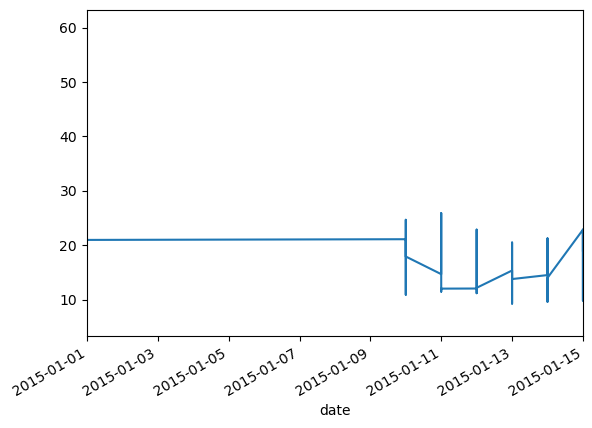

In [148]:
fig,ax=plt.subplots()
lthw[' LSP amp'].plot(ax=ax)
ax.set_xlim(['2015-01-01','2015-01-15'])
fig.show()

In [149]:
thwaites_melt_mean

<xarray.DataArray (__xarray_dataarray_variable__: 1, time: 365)>
array([[ 7.30100292e-05,  7.78281828e-05,  1.47814062e-04,
         5.02658193e-04,  4.38735908e-04,  1.66191661e-04,
         3.38429207e-04,  9.33819028e-05,  4.59032635e-05,
         3.78711236e-04,  6.72103313e-04,  2.62771064e-04,
         2.94207821e-05,  1.24779435e-05,  2.12584608e-04,
         1.43236757e-04,  3.41306113e-05,  3.61561106e-05,
         8.38656888e-06,  1.11864711e-05,  3.67757224e-07,
         5.80257222e-07,  3.43611318e-05,  3.85829298e-05,
         2.99822805e-05,  5.43262104e-05,  3.40552870e-05,
         9.34663149e-06, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
         9.47393073e-06,  8.64248250e-06,  2.19234721e-06,
         6.09199446e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
...
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08, -2.14972147e-08,
        -2.14972147e-08, -2.14972147e-08,  1.65824292e-06,
         2.16287590e-05,  3.63210929e-05,  1.87965619e-04,
         1.57064802e-04,  2.74323131e-04,  3.41077888e-04,
         1.67241436e-04,  3.49615912e-05,  3.36777041e-04,
         1.32776200e-04,  7.19969685e-05,  3.27498201e-05,
         2.07850782e-04,  3.62427760e-04]], dtype=float32)
Coordinates:
  * __xarray_dataarray_variable__  (__xarray_dataarray_variable__) object 'smlt'
  * time                           (time) datetime64[ns] 2015-01-01 ... 2015-...

/opt/anaconda3/envs/gnssir/lib/python3.11/site-packages/pygmt/clib/conversion.py:107: RuntimeWarning: Grid may have irregular spacing in the 'longitude' dimension, but GMT only supports regular spacing. Calculated regular spacing 0.09999999830410791 is assumed in the 'longitude' dimension.
  warnings.warn(msg, category=RuntimeWarning)
/opt/anaconda3/envs/gnssir/lib/python3.11/site-packages/pygmt/clib/conversion.py:107: RuntimeWarning: Grid may have irregular spacing in the 'latitude' dimension, but GMT only supports regular spacing. Calculated regular spacing -0.1 is assumed in the 'latitude' dimension.
  warnings.warn(msg, category=RuntimeWarning)


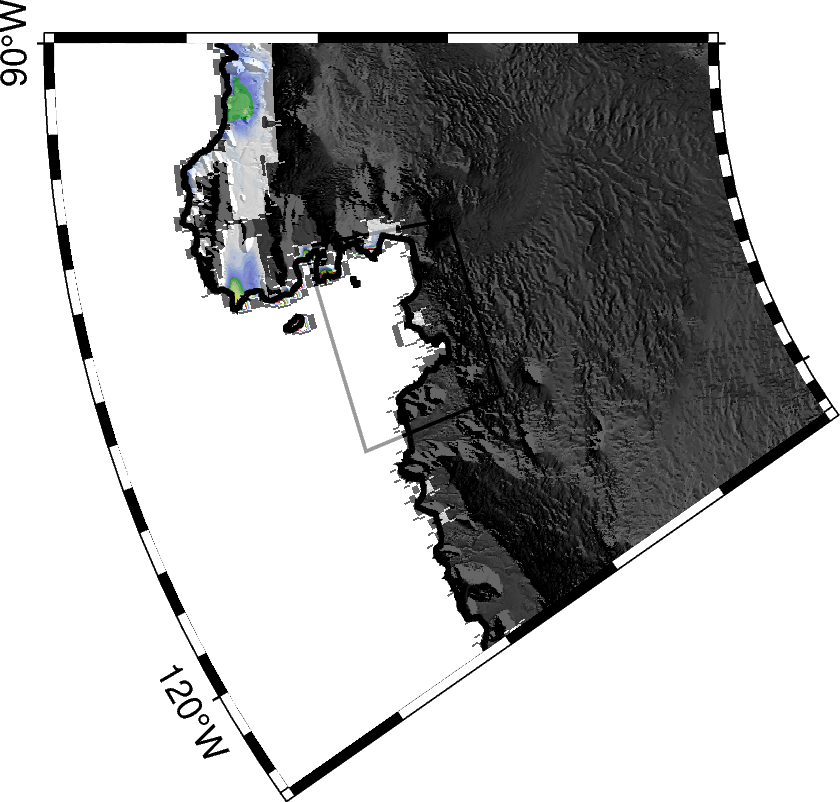

In [150]:
fig = pygmt.Figure()
fig.basemap(region="-125/-90/-80/-70", projection="s0/-90/-71/1:20000000",
    frame="a30f")
gradient=pygmt.makecpt(cmap="gray", series=[-.5, .5, .001])
fig.grdimage(grid=dgrid)
fig.coast(water="white")
rectangle = [[min_lon, min_lat, max_lon, max_lat]]
fig.plot(data=rectangle, style="r+s", pen=".75p,black")
fig.grdimage(grid=snowmelt_daily.max('time')[0]*10,cmap='/Users/andrew/projects/thwaites-gnss-ir/paper/figs/fig10/ar.v2.cpt',dpi=300.,transparency=40,nan_transparent=True)

fig.coast(shorelines="1p,black",resolution='f')
#fig.plot(x=[-109.043457775],y=[-77.5817863853],color='dodgerblue',style="a.1c",pen=".01p")
#fig.plot(x=[-120.728651499],y=[-76.1546591178],color='mediumpurple',style="a.08c",pen=".01p")

fig.show()

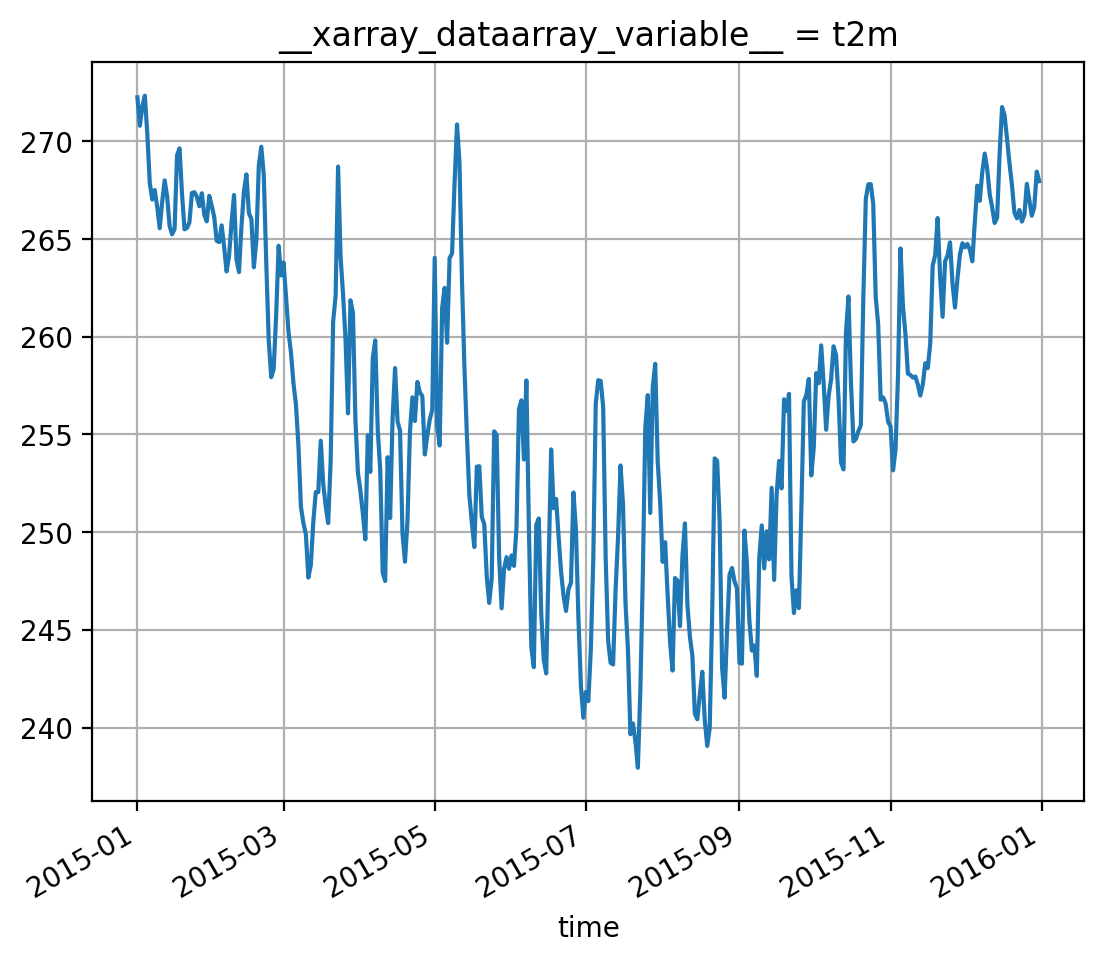

In [155]:
fig,ax=plt.subplots(dpi=200)
thwaites_temperature_mean.plot(ax=ax)
ax.grid(True)
#ax.set_xlim([thwaites_temperature_mean['time'][0],thwaites_temperature_mean['time'][15]])
#ax.set_ylim([270,274])


In [152]:
thwaites_temperature_mean['time'][0]

<xarray.DataArray 'time' ()>
array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2015-01-01

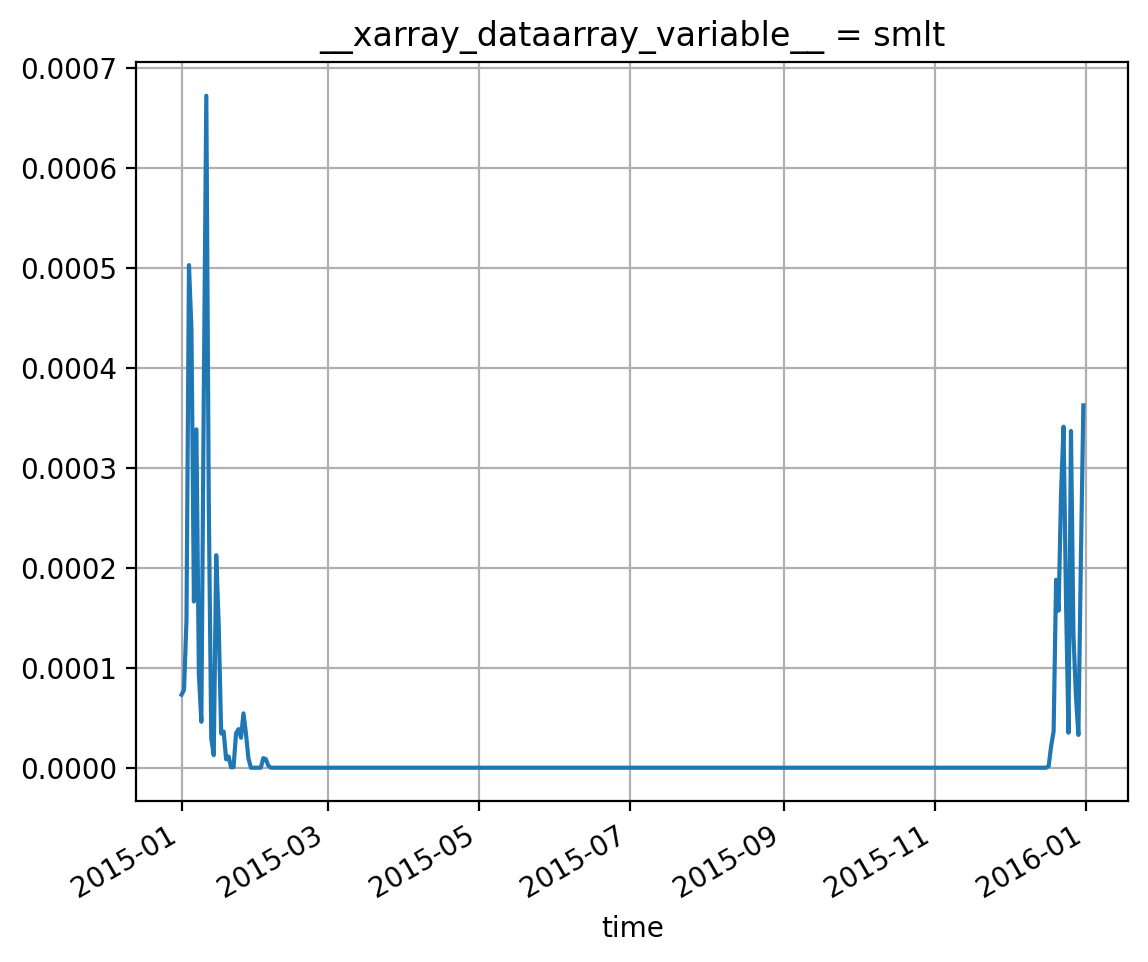

In [153]:
fig,ax=plt.subplots(dpi=200)
thwaites_melt_mean.plot(ax=ax)
ax.grid(True)

# pygmt figures in polar stereographic projection
We can use the gradient of the surface topographic to create a hillslope map of Antarctica that with a gray colormap functions as a great base layer for continent scale maps of the continent. I've included in this figure the area where I've indexed hourly accumulation data that we can use to interogate the frequency of accumulation events at Hercules Dome.

In [6]:
def xr_rasterize(gdf,
                 da,
                 attribute_col=False,
                 crs=None,
                 transform=None,
                 name=None,
                 x_dim='x',
                 y_dim='y',
                 export_tiff= None,
                 **rasterio_kwargs):    
    """
    Rasterizes a geopandas.GeoDataFrame into an xarray.DataArray.
    
    Parameters
    ----------
    gdf : geopandas.GeoDataFrame
        A geopandas.GeoDataFrame object containing the vector/shapefile
        data you want to rasterise.
    da : xarray.DataArray
        The shape, coordinates, dimensions, and transform of this object 
        are used to build the rasterized shapefile. It effectively 
        provides a template. The attributes of this object are also 
        appended to the output xarray.DataArray.
    attribute_col : string, optional
        Name of the attribute column in the geodataframe that the pixels 
        in the raster will contain.  If set to False, output will be a 
        boolean array of 1's and 0's.
    crs : str, optional
        CRS metadata to add to the output xarray. e.g. 'epsg:3577'.
        The function will attempt get this info from the input 
        GeoDataFrame first.
    transform : affine.Affine object, optional
        An affine.Affine object (e.g. `from affine import Affine; 
        Affine(30.0, 0.0, 548040.0, 0.0, -30.0, "6886890.0) giving the 
        affine transformation used to convert raster coordinates 
        (e.g. [0, 0]) to geographic coordinates. If none is provided, 
        the function will attempt to obtain an affine transformation 
        from the xarray object (e.g. either at `da.transform` or
        `da.geobox.transform`).
    x_dim : str, optional
        An optional string allowing you to override the xarray dimension 
        used for x coordinates. Defaults to 'x'.    
    y_dim : str, optional
        An optional string allowing you to override the xarray dimension 
        used for y coordinates. Defaults to 'y'.
    export_tiff: str, optional
        If a filepath is provided (e.g 'output/output.tif'), will export a
        geotiff file. A named array is required for this operation, if one
        is not supplied by the user a default name, 'data', is used
    **rasterio_kwargs : 
        A set of keyword arguments to rasterio.features.rasterize
        Can include: 'all_touched', 'merge_alg', 'dtype'.
    
    Returns
    -------
    xarr : xarray.DataArray
    
    """
    
    # Check for a crs object
    try:
        crs = da.crs
    except:
        if crs is None:
            raise Exception("Please add a `crs` attribute to the "
                            "xarray.DataArray, or provide a CRS using the "
                            "function's `crs` parameter (e.g. 'EPSG:3577')")
    

    # Check if transform is provided as a xarray.DataArray method.
    # If not, require supplied Affine
    if transform is None:
        try:
            # First, try to take transform info from geobox
            transform = da.geobox.transform
        # If no geobox
        except:
            try:
                # Try getting transform from 'transform' attribute
                transform = da.transform
            except:
                # If neither of those options work, raise an exception telling the 
                # user to provide a transform
                raise Exception("Please provide an Affine transform object using the "
                        "`transform` parameter (e.g. `from affine import "
                        "Affine; Affine(30.0, 0.0, 548040.0, 0.0, -30.0, "
                        "6886890.0)`")
    
    # Get the dims, coords, and output shape from da
    da = da.squeeze()
    y, x = da.shape
    dims = list(da.dims)
    xy_coords = [da[y_dim], da[x_dim]]   
    
    # Reproject shapefile to match CRS of raster
    print(f'Rasterizing to match xarray.DataArray dimensions ({y}, {x}) '
          f'and projection system/CRS (e.g. {crs})')
    
    try:
        gdf_reproj = gdf.to_crs(crs=crs)
    except:
        #sometimes the crs can be a datacube utils CRS object
        #so convert to string before reprojecting
        gdf_reproj = gdf.to_crs(crs={'init':str(crs)})
    
    # If an attribute column is specified, rasterise using vector 
    # attribute values. Otherwise, rasterise into a boolean array
    if attribute_col:
        
        # Use the geometry and attributes from `gdf` to create an iterable
        shapes = zip(gdf_reproj.geometry, gdf_reproj[attribute_col])

        # Convert polygons into a numpy array using attribute values
        arr = rasterio.features.rasterize(shapes=shapes,
                                          out_shape=(y, x),
                                          transform=transform,
                                          **rasterio_kwargs)
    else:
        # Convert polygons into a boolean numpy array 
        arr = rasterio.features.rasterize(shapes=gdf_reproj.geometry,
                                          out_shape=(y, x),
                                          transform=transform,
                                          **rasterio_kwargs)
        
    # Convert result to a xarray.DataArray
    if name is not None:
        xarr = xr.DataArray(arr,
                           coords=xy_coords,
                           dims=dims,
                           attrs=da.attrs,
                           name=name)
    else:
        xarr = xr.DataArray(arr,
                   coords=xy_coords,
                   dims=dims,
                   attrs=da.attrs)
    
    #add back crs if da.attrs doesn't have it
    if 'crs' not in xarr.attrs:
        xarr.attrs['crs'] = str(crs)
    
    if export_tiff:
            try:
                print("Exporting GeoTIFF with array name: " + name)
                ds = xarr.to_dataset(name = name)
                #xarray bug removes metadata, add it back
                ds[name].attrs = xarr.attrs 
                ds.attrs = xarr.attrs
                write_geotiff(export_tiff, ds) 
                
            except:
                print("Exporting GeoTIFF with default array name: 'data'")
                ds = xarr.to_dataset(name = 'data')
                ds.data.attrs = xarr.attrs
                ds.attrs = xarr.attrs
                write_geotiff(export_tiff, ds)
                
    return xarr

In [7]:
#temperature=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_2m_temperature_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
#windu=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_10m_u_component_of_wind_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
windv=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_10m_v_component_of_wind_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
windv_daily = windv.resample(time='1D',skipna=False).sum()
del windv

In [6]:
#temperature=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_2m_temperature_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
windu=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_10m_u_component_of_wind_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
#windv=xr.load_dataset('/Volumes/Hoffman/data/era5/era5_10m_v_component_of_wind_hourly_2012.nc').to_array('__xarray_dataarray_variable__')
windu_daily = windu.resample(time='1D',skipna=False).sum()
del windu

NameError: name 'hercdome_mean' is not defined

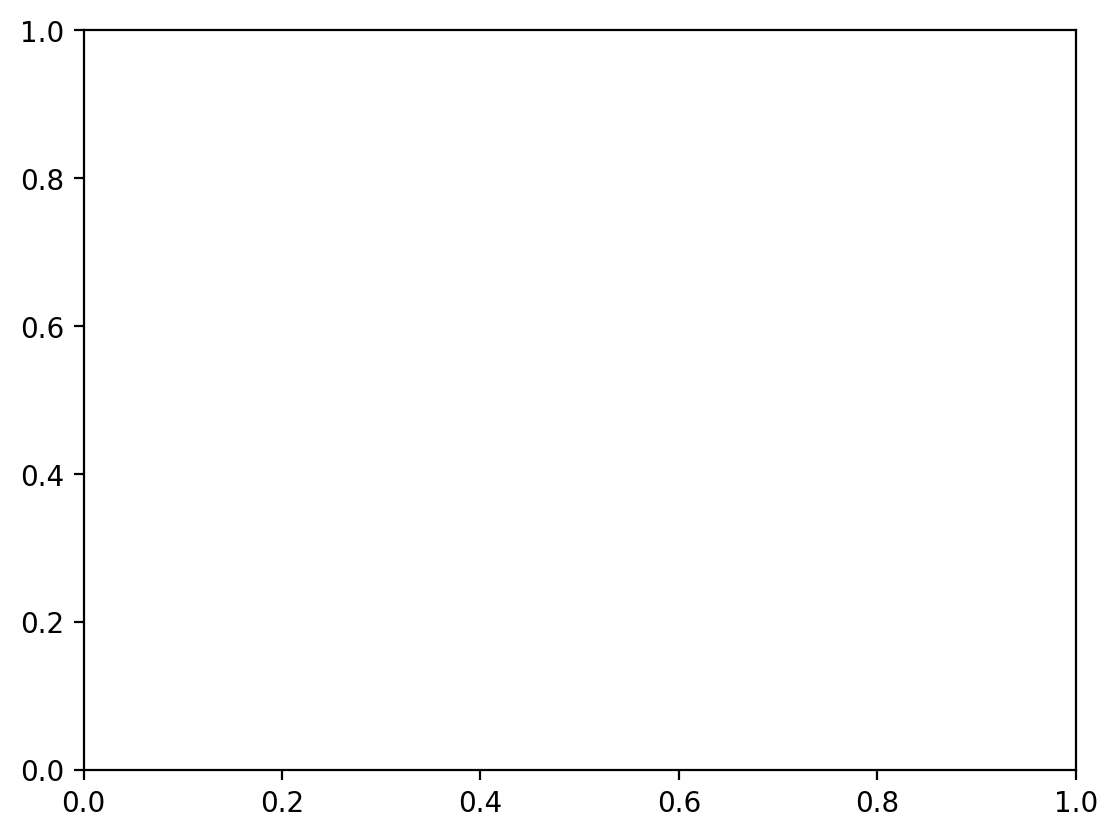

In [15]:
fig,ax=plt.subplots(dpi=200)
hercdome_mean.plot.hist(ax=ax)
ax.grid(True)

# Motivation for blocking study and the atmospheric condidtions that promote snow fall at Hercules Dome.
The accumulation gradient that we observe at Hercules dome and the reanalysis you've already analyzed suggests that snowfall comes from the grid NE. This is something we can show and plot by interrogating $10$ m winds in era5 across Hercules Dome associated with extreme precipitation events (here defined as 90th percentile), which below we show account for almost $50\%$ of the total annual accumluation at present at Hercules Dome.

In [79]:
(hercdome_mean.where(hercdome_mean>hercdome_mean.quantile(.90)).sum()/hercdome_mean.sum())

<xarray.DataArray ()>
array(0.4606363, dtype=float32)
Coordinates:
    quantile  float64 0.9

/opt/anaconda3/envs/pygmt_blocking/lib/python3.9/site-packages/pygmt/clib/conversion.py:107: RuntimeWarning: Grid may have irregular spacing in the 'longitude' dimension, but GMT only supports regular spacing. Calculated regular spacing 0.09999999830410791 is assumed in the 'longitude' dimension.
  warnings.warn(msg, category=RuntimeWarning)
/opt/anaconda3/envs/pygmt_blocking/lib/python3.9/site-packages/pygmt/clib/conversion.py:107: RuntimeWarning: Grid may have irregular spacing in the 'latitude' dimension, but GMT only supports regular spacing. Calculated regular spacing -0.1 is assumed in the 'latitude' dimension.
  warnings.warn(msg, category=RuntimeWarning)


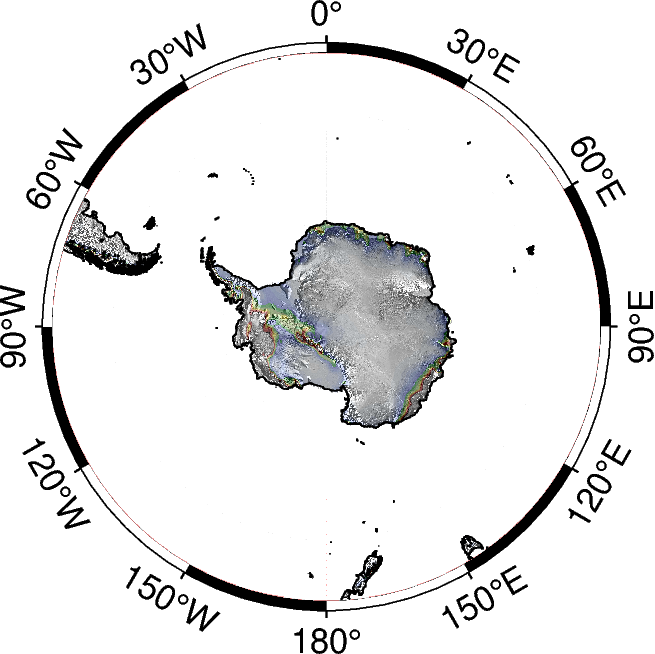

In [37]:
fig = pygmt.Figure()
fig.basemap(region="0/360/-90/-40", projection="s0/-90/-71/1:250000000",
    frame="a30f")
gradient=pygmt.makecpt(cmap="gray", series=[-.5, .5, .001])
fig.grdimage(grid=dgrid)
fig.coast(water="white")
#rectangle = [[min_lon, min_lat, max_lon, max_lat]]
fig.grdimage(snowfall_daily.where(hercdome_mean>hercdome_mean.quantile(.90)).mean('time',skipna=True)[0]*50,cmap='../paper/figs/fig10/ar.cpt', transparency=70)
#fig.grdimage(grid=topo,cmap='~/projects/thwaites-gnss-ir/paper/figs/fig10/gradient.cpt',dpi=300)

fig.coast(shorelines=".3p,black",resolution='f')
#fig.plot(x=[-109.043457775],y=[-77.5817863853],color='dodgerblue',style="a.1c",pen=".01p")
#fig.plot(x=[-120.728651499],y=[-76.1546591178],color='mediumpurple',style="a.08c",pen=".01p")

fig.show()


In [57]:
snowfall_daily.where(hercdome_mean>hercdome_mean.quantile(.90)).mean('time',skipna=True)

<xarray.DataArray (__xarray_dataarray_variable__: 1, latitude: 501,
                   longitude: 3600)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00855119, 0.00855206, 0.00855285, ..., 0.00854749,
         0.00854874, 0.00855022],
        [0.00854403, 0.00854412, 0.00854444, ..., 0.00854075,
         0.008542  , 0.00854306],
        [0.00818336, 0.00818336, 0.00818336, ..., 0.00818336,
         0.00818336, 0.00818336]]], dtype=float32)
Coordinates:
  * longitude                      (longitude) float32 -180.0 -179.9 ... 179.9
  * latitude                       (latitude) float32 -40.0 -40.1 ... -90.0
  * __xarray_dataarray_variable__  (__xarray_dataarray_variable__) object 'sf'
    quantile                       float64 0.9

In [77]:
windu_daily.where((hercdome_mean>hercdome_mean.quantile(.90)).drop('__xarray_dataarray_variable__')).mean('time',skipna=True)

<xarray.DataArray (__xarray_dataarray_variable__: 1, latitude: 501,
                   longitude: 3600)>
array([[[  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        ...,
        [-17.322937, -17.434183, -17.54595 , ..., -16.992332,
         -17.102736, -17.213009],
        [-17.14317 , -17.266909, -17.390768, ..., -16.763388,
         -16.889309, -17.017122],
        [-98.93899 , -98.93899 , -98.93899 , ..., -98.93899 ,
         -98.93899 , -98.93899 ]]], dtype=float32)
Coordinates:
  * longitude                      (longitude) float32 -180.0 -179.9 ... 179.9
  * latitude                       (latitude) float32 -40.0 -40.1 ... -90.0
  * __xarray_dataarray_variable__  (__xarray_dataarray_variable__) object 'u10'
    quantile                       float64 0.9

In [64]:
windv_daily.mean('time',skipna=True)

<xarray.DataArray (__xarray_dataarray_variable__: 1, latitude: 501,
                   longitude: 3600)>
array([[[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        ...,
        [56.702015, 56.77694 , 56.851974, ..., 56.41928 , 56.51339 ,
         56.60755 ],
        [56.602245, 56.681908, 56.761536, ..., 56.293587, 56.396484,
         56.49933 ],
        [65.72646 , 65.72646 , 65.72646 , ..., 65.72646 , 65.72646 ,
         65.72646 ]]], dtype=float32)
Coordinates:
  * longitude                      (longitude) float32 -180.0 -179.9 ... 179.9
  * latitude                       (latitude) float32 -40.0 -40.1 ... -90.0
  * __xarray_dataarray_variable__  (__xarray_dataarray_variable__) object 'v10'

In [78]:
u_exe=windu_daily.where((hercdome_mean>hercdome_mean.quantile(.90)).drop('__xarray_dataarray_variable__')).mean('time',skipna=True)[0]
v_exe=windv_daily.where((hercdome_mean>hercdome_mean.quantile(.90)).drop('__xarray_dataarray_variable__')).mean('time',skipna=True)[0]




fig = pygmt.Figure()
fig.grdimage(grid=u_exe,img_out='u.nc')
fig.grdimage(grid=v_exe,img_out='v.nc')

fig.basemap(region="200/302/-89/-83.5", projection="s0/-90/-71/1:5000000",
    frame="a30f")
gradient=pygmt.makecpt(cmap="gray", series=[-.5, .5, .001])
fig.grdimage(grid=dgrid)
fig.coast(water="white")
#rectangle = [[min_lon, min_lat, max_lon, max_lat]]
fig.grdimage(snowfall_daily.where(hercdome_mean>hercdome_mean.quantile(.90)).mean('time',skipna=True)[0]*40,cmap='../paper/figs/fig10/ar.cpt', transparency=70)
#fig.grdimage(grid=topo,cmap='~/projects/thwaites-gnss-ir/paper/figs/fig10/gradient.cpt',dpi=300)
with pygmt.clib.Session() as session:
    session.call_module('grdvector', 
                        f'u.grd v.grd -I10d/10d -Gwhite -Q0.1i+e+gwhite -W0.8p,black -Si0.1d')
    
fig.coast(shorelines=".3p,black",resolution='f')
#fig.plot(x=[-109.043457775],y=[-77.5817863853],color='dodgerblue',style="a.1c",pen=".01p")
#fig.plot(x=[-120.728651499],y=[-76.1546591178],color='mediumpurple',style="a.08c",pen=".01p")

fig.show()

/opt/anaconda3/envs/pygmt_blocking/lib/python3.9/site-packages/pygmt/clib/conversion.py:107: RuntimeWarning: Grid may have irregular spacing in the 'longitude' dimension, but GMT only supports regular spacing. Calculated regular spacing 0.09999999830410791 is assumed in the 'longitude' dimension.
  warnings.warn(msg, category=RuntimeWarning)
/opt/anaconda3/envs/pygmt_blocking/lib/python3.9/site-packages/pygmt/clib/conversion.py:107: RuntimeWarning: Grid may have irregular spacing in the 'latitude' dimension, but GMT only supports regular spacing. Calculated regular spacing -0.1 is assumed in the 'latitude' dimension.
  warnings.warn(msg, category=RuntimeWarning)
grdimage [ERROR]: Option -A: No output argument allowed
grdimage [ERROR]: Option -A: Must provide an output filename for image


GMTCLibError: Module 'grdimage' failed with status code 72:
grdimage [ERROR]: Option -A: No output argument allowed
grdimage [ERROR]: Option -A: Must provide an output filename for image

NameError: name 'uwind' is not defined

In [48]:
snowfall_daily.longitude

<xarray.DataArray 'longitude' (longitude: 3600)>
array([-180. , -179.9, -179.8, ...,  179.7,  179.8,  179.9], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
Attributes:
    units:      degrees_east
    long_name:  longitude

In [32]:
snowfall_daily.where(hercdome_mean>hercdome_mean.quantile(.90)).mean('time',skipna=True)[0]*1000

<xarray.DataArray (latitude: 501, longitude: 3600)>
array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [8.551185, 8.552062, 8.552847, ..., 8.547494, 8.548739, 8.550218],
       [8.544028, 8.54412 , 8.544444, ..., 8.54075 , 8.541998, 8.543059],
       [8.183363, 8.183363, 8.183363, ..., 8.183363, 8.183363, 8.183363]],
      dtype=float32)
Coordinates:
  * longitude                      (longitude) float32 -180.0 -179.9 ... 179.9
  * latitude                       (latitude) float32 -40.0 -40.1 ... -90.0
    __xarray_dataarray_variable__  <U2 'sf'
    quantile                       float64 0.9